## Sentiment analysis using Pythno (NLP)

#### Cleaning Text - Steps
1. Create a text file and read text from it
2. Convert the text into lower case.
3. Remove punctuations

In [87]:
text = open('read.txt', encoding='utf-8').read()
# text = open('read.txt','r')

In [88]:
print(text)

I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.

The first story is about connecting the dots.

I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?

It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: “

In [89]:
# Convert to lower
lower_case = text.lower()

In [90]:
# remove punctuations
import string

In [91]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [92]:
# translation
cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))

In [94]:
cleaned_text = cleaned_text.strip() # for removing space at end or beginning of the sentence
print(cleaned_text)

i am honored to be with you today at your commencement from one of the finest universities in the world i never graduated from college truth be told this is the closest i’ve ever gotten to a college graduation today i want to tell you three stories from my life that’s it no big deal just three stories

the first story is about connecting the dots

i dropped out of reed college after the first 6 months but then stayed around as a dropin for another 18 months or so before i really quit so why did i drop out

it started before i was born my biological mother was a young unwed college graduate student and she decided to put me up for adoption she felt very strongly that i should be adopted by college graduates so everything was all set for me to be adopted at birth by a lawyer and his wife except that when i popped out they decided at the last minute that they really wanted a girl so my parents who were on a waiting list got a call in the middle of the night asking “we have an unexpected b

In [95]:
# Tokenization - i.e. breaking the snetence into words
tokenized_words = cleaned_text.split(' ') # seperator is 'space '
# print(tokenized_words)

NLP is analysis of words and not sentences

**stop words** - words that doesnt add any meaning to the senence

In [96]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
# we have added these manually, but these are available in NLTK package

In [97]:
final_words = []

# use a for loop
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)

# print(final_words)

### NLP emotions algorithm

In [98]:
# emotions.txt - contains words and emotions that they represents, in form of key:value pair

#### NLP emotions algorithm
1. Check if the owrd in final_word_list is also present in emotions.txt file
* open the emotion file
* loop through each line and clear it
* extract the word andemotion using split

In [99]:
emotion_list = []
with open('emotions.txt','r') as file:
    for line in file:
        clear_line = line.replace('\n','').replace(',','').replace("'",'').strip()
        word, emotion = clear_line.split(':')
        
        if word in final_words:
            emotion_list.append(emotion)

In [100]:
print(emotion_list)

[' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']


In [101]:
# Now count the occurence of each emotion and
# based on highest occurence, the tone of the text is decided

In [102]:
from collections import Counter
# returns count of each item in iterable

In [103]:
w = Counter(emotion_list)
print(w)

Counter({' happy': 5, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


In [104]:
type(w)

collections.Counter

In [105]:
import matplotlib.pyplot as plt

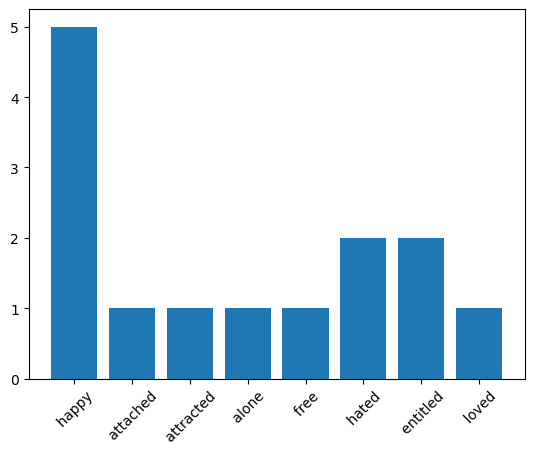

In [112]:
plt.bar(w.keys(), w.values())
plt.xticks(rotation=45)
plt.savefig('emotions_bar_chart.png')
plt.show()

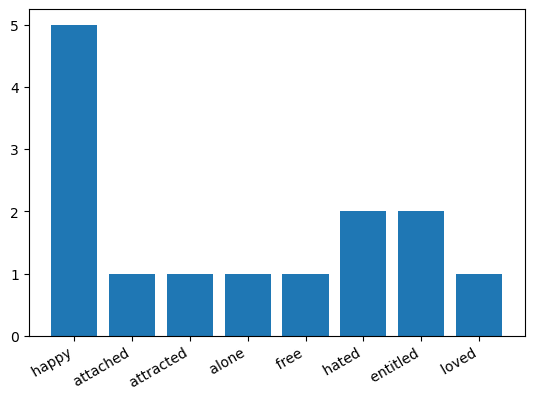

In [114]:
# another way - to auto format the labels and axes
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('auto_format_figure.png')
# fig.show()

## Tweet sentiment analysis
* using GetOldTweets3 package (this way we dont need to use Twitter API)